## Description
This notebook visualises the results from the notebooks before using a confusion matrix.

The code was created with the assistance of ChatGPT-4.

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define parameters
inputdata_file = 'data/02_predicted_data.csv' 
df = pd.read_csv(inputdata_file, dtype={'mobilitydata_labelled': 'boolean'}, low_memory=False)

In [2]:
# Define categories based on confusion matrix results
df['mobilitydata_generated'] = df['mobilitydata_generated'].map({'T': True, 'F': False}).astype('boolean')
df['Confusion_Matrix_Category'] = 'Unknown'
df.loc[(df['mobilitydata_labelled'] == True) & (df['mobilitydata_generated'] == True), 'Confusion_Matrix_Category'] = 'True Positive'
df.loc[(df['mobilitydata_labelled'] == False) & (df['mobilitydata_generated'] == False), 'Confusion_Matrix_Category'] = 'True Negative'
df.loc[(df['mobilitydata_labelled'] == False) & (df['mobilitydata_generated'] == True), 'Confusion_Matrix_Category'] = 'False Positive'
df.loc[(df['mobilitydata_labelled'] == True) & (df['mobilitydata_generated'] == False), 'Confusion_Matrix_Category'] = 'False Negative'

# Count the number of occurrences of each category
category_counts = df['Confusion_Matrix_Category'].value_counts()

# Print the result
print(f"""
Confusion Matrix Counts:
-------------------------
True Positive  (TP): {category_counts.get('True Positive', 0)}  - Predicted as 'Mobility Data' and is actually Mobility Data
True Negative  (TN): {category_counts.get('True Negative', 0)}  - Predicted as 'Not Mobility Data' and is actually Not Mobility Data
False Positive (FP): {category_counts.get('False Positive', 0)}  - Predicted as 'Mobility Data' but is actually Not Mobility Data
False Negative (FN): {category_counts.get('False Negative', 0)}  - Predicted as 'Not Mobility Data' but is actually Mobility Data
""")


Confusion Matrix Counts:
-------------------------
True Positive  (TP): 15  - Predicted as 'Mobility Data' and is actually Mobility Data
True Negative  (TN): 83  - Predicted as 'Not Mobility Data' and is actually Not Mobility Data
False Positive (FP): 6  - Predicted as 'Mobility Data' but is actually Not Mobility Data
False Negative (FN): 2  - Predicted as 'Not Mobility Data' but is actually Mobility Data



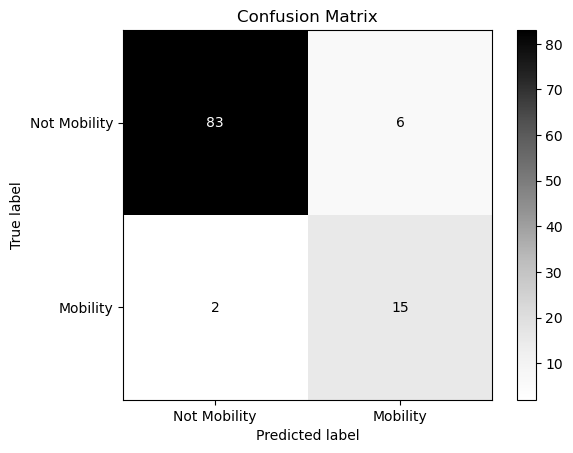

In [3]:
# Generate the confusion matrix using boolean columns
cm = confusion_matrix(df['mobilitydata_labelled'], df['mobilitydata_generated'])

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Mobility", "Mobility"])
disp.plot(cmap=plt.cm.Greys)
plt.title('Confusion Matrix')
plt.show()